# Importing Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam

In [51]:
cancer_dataset = pd.read_csv('../Dataset/dataset_with_missing_values.csv')

In [52]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
cancer_dataset = cancer_dataset.drop(columns='id', axis=1)

# Checking The Shape Of The Dataset

In [54]:
cancer_dataset.shape

(5121, 31)

In [55]:
cancer_dataset.isnull().sum()

diagnosis                   0
radius_mean                 2
texture_mean                4
perimeter_mean              3
area_mean                   4
smoothness_mean            12
compactness_mean            5
concavity_mean             16
concave points_mean        12
symmetry_mean               9
fractal_dimension_mean      7
radius_se                  19
texture_se                  4
perimeter_se                7
area_se                     4
smoothness_se              14
compactness_se             12
concavity_se                7
concave points_se          11
symmetry_se                 7
fractal_dimension_se       11
radius_worst                2
texture_worst               5
perimeter_worst             7
area_worst                  2
smoothness_worst            4
compactness_worst           9
concavity_worst             4
concave points_worst        8
symmetry_worst              5
fractal_dimension_worst     6
dtype: int64

# Setting Threshold as 70%

In [56]:
cancer_dataset = cancer_dataset.dropna(thresh=cancer_dataset.shape[1]-9, axis=0)

In [57]:
cancer_dataset.shape

(5112, 31)

In [58]:
cancer_dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5112.000000,5110.000000,5111.000000,5111.000000,5105.000000,5108.000000,5100.000000,5104.000000,5107.000000,5106.000000,...,5111.000000,5109.000000,5110.000000,5112.000000,5110.000000,5109.000000,5111.000000,5110.000000,5111.000000,5109.000000
mean,14.208070,19.291579,91.988445,654.870554,0.096707,0.104426,0.089079,0.049110,0.181158,0.062790,...,16.270562,25.682664,107.273599,880.701995,0.132375,0.254426,0.272382,0.114642,0.290091,0.083963
std,4.270376,4.300208,24.601481,351.751841,0.022238,0.052789,0.080629,0.040825,0.027390,0.007094,...,4.831485,6.144758,33.592748,569.147901,0.022828,0.157300,0.208531,0.065705,0.061834,0.018055
min,6.981000,9.710000,10.340000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.011110,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.100000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057693,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.093620,0.061550,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.850000,21.807500,104.100000,782.700000,0.105300,0.130400,0.131900,0.074040,0.195700,0.066142,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,96.570000,39.280000,356.100000,2501.000000,0.968200,0.345400,0.955900,0.956230,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
cancer_dataset.shape

(5112, 31)

# Categorical Encoding

B --> 0

M --> 1

In [60]:
cancer_dataset.replace({'diagnosis': {'B':0, 'M':1}}, inplace=True)

In [61]:
cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# value counts

In [62]:
cancer_dataset['diagnosis'].value_counts()

0    3206
1    1906
Name: diagnosis, dtype: int64

In [63]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5120
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                5112 non-null   int64  
 1   radius_mean              5112 non-null   float64
 2   texture_mean             5110 non-null   float64
 3   perimeter_mean           5111 non-null   float64
 4   area_mean                5111 non-null   float64
 5   smoothness_mean          5105 non-null   float64
 6   compactness_mean         5108 non-null   float64
 7   concavity_mean           5100 non-null   float64
 8   concave points_mean      5104 non-null   float64
 9   symmetry_mean            5107 non-null   float64
 10  fractal_dimension_mean   5106 non-null   float64
 11  radius_se                5100 non-null   float64
 12  texture_se               5109 non-null   float64
 13  perimeter_se             5109 non-null   float64
 14  area_se                 

In [64]:
cancer_dataset.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.212896,17.915546,78.026168,462.596818,0.092473,0.080155,0.046142,0.026018,0.174178,0.062870,...,13.377270,23.51852,86.994353,558.659295,0.124956,0.182739,0.166350,0.074433,0.270221,0.079455
1,17.564066,21.608577,115.466459,978.455643,0.103832,0.145199,0.161152,0.088018,0.192911,0.062655,...,21.135724,29.31947,141.391701,1422.396065,0.144857,0.374894,0.450678,0.182234,0.323503,0.091537


# Correlation Matrix

In [65]:
correlation = cancer_dataset.corr()

In [66]:
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.606007,0.415270,0.736021,0.709186,0.247029,0.595974,0.690007,0.734293,0.330718,...,0.776617,0.456605,0.783097,0.733924,0.421589,0.590842,0.659419,0.793508,0.416742,0.323656
radius_mean,0.606007,1.000000,0.275646,0.819953,0.816445,0.103375,0.426031,0.558599,0.645207,0.132122,...,0.802930,0.254948,0.801593,0.778590,0.097881,0.353394,0.450075,0.618730,0.143311,0.017890
texture_mean,0.415270,0.275646,1.000000,0.326958,0.321440,-0.009458,0.236926,0.300320,0.270254,0.070972,...,0.352970,0.912265,0.358154,0.343799,0.077061,0.278073,0.301025,0.295499,0.105037,0.118705
perimeter_mean,0.736021,0.819953,0.326958,1.000000,0.979135,0.145950,0.550645,0.700853,0.797505,0.179386,...,0.962393,0.300051,0.963462,0.935376,0.147701,0.451281,0.557897,0.764648,0.186405,0.049663
area_mean,0.709186,0.816445,0.321440,0.979135,1.000000,0.127424,0.498136,0.677475,0.779056,0.151763,...,0.962712,0.287887,0.959112,0.959191,0.123796,0.390507,0.512525,0.721970,0.143905,0.004036
smoothness_mean,0.247029,0.103375,-0.009458,0.145950,0.127424,1.000000,0.431715,0.351272,0.346853,0.351839,...,0.151221,0.022199,0.164394,0.146034,0.525409,0.313469,0.298278,0.333085,0.245662,0.333790
compactness_mean,0.595974,0.426031,0.236926,0.550645,0.498136,0.431715,1.000000,0.875696,0.786156,0.602648,...,0.534931,0.248026,0.589808,0.509208,0.565357,0.865530,0.815829,0.815188,0.510067,0.687347
concavity_mean,0.690007,0.558599,0.300320,0.700853,0.677475,0.351272,0.875696,1.000000,0.864191,0.498739,...,0.679791,0.297957,0.720945,0.667513,0.446937,0.749316,0.876052,0.853781,0.409045,0.511165
concave points_mean,0.734293,0.645207,0.270254,0.797505,0.779056,0.346853,0.786156,0.864191,1.000000,0.437751,...,0.785755,0.271043,0.810115,0.766342,0.434261,0.633568,0.713158,0.862847,0.357821,0.350683
symmetry_mean,0.330718,0.132122,0.070972,0.179386,0.151763,0.351839,0.602648,0.498739,0.437751,1.000000,...,0.185949,0.090140,0.219393,0.177513,0.426341,0.473408,0.433859,0.430798,0.699563,0.438941


In [67]:
data = cancer_dataset.values

In [68]:
data

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [69]:
data.shape

(5112, 31)

In [70]:
data.shape[1]

31

In [71]:
ix = [i for i in range(data.shape[1]) if i != 0] 

In [72]:
x, y = data[:, ix], data[:, 0]

# Summarizing Total Missing Values

In [73]:
print('Missing: %d' % sum(np.isnan(x).flatten())) 

Missing: 123


In [74]:
# Using KNNImputer to Impute Missing Values

In [75]:
# define imputer 
imputer = KNNImputer(n_neighbors=6)

In [76]:
#fit on the dataset
imputer.fit(x)

KNNImputer(n_neighbors=6)

In [77]:
# transforming the dataset
xtrans = imputer.transform(x) 

# Summarizing Total Missing After Imputation

In [78]:

print('Missing: %d' % sum(np.isnan(xtrans).flatten()))

Missing: 0


In [79]:
xtrans.shape

(5112, 30)

# Dimensionality reduction using PCA

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrans)
x = scaler.transform(xtrans)

In [81]:
x.shape

(5112, 30)

In [82]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cumilative variance')

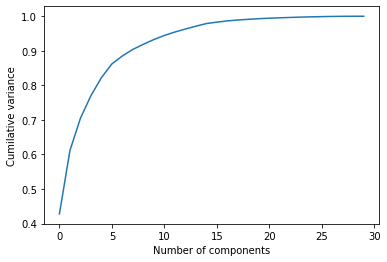

In [83]:
pca_test = PCA(n_components=30)
pca_test.fit(x)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumilative variance")

In [84]:
# picking 5 components
n_PCA_components = 5
pca = PCA(n_components=n_PCA_components)
principalComponents = pca.fit_transform(x)

In [85]:
principalDf = pd.DataFrame(data=principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [86]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5
0,9.037570,1.828426,-1.082765,-3.590454,1.764050
1,2.331469,-3.615470,-0.523397,-1.192009,-0.450692
2,5.562428,-1.095711,-0.520746,-0.891514,0.273253
3,6.976095,9.958916,-3.263958,-0.013604,3.462305
4,3.787583,-1.888923,1.447046,-2.917817,-0.473668


In [87]:
print('Explained variance per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variance per principal component: [0.42807722 0.18309548 0.09343165 0.06550512 0.05219477]


In [88]:
sum_list = [0.4426272,  0.18964872, 0.09390584, 0.06601566, 0.05492504]
sum(sum_list*100)

84.71224600000008

In [89]:
print('Amount of information lost due to PCA: ', (1-np.sum(pca.explained_variance_ratio_))*100, '%')

Amount of information lost due to PCA:  17.76957583579547 %


In [90]:
ydf = pd.DataFrame(y, columns=['y']) 

In [91]:
# finalDf = pd.concat([principalDf, cancer_dataset[['diagnosis']]], axis=1)
finalDf = pd.concat([principalDf, ydf], axis=1)

In [92]:
principalDf.shape

(5112, 5)

In [93]:
finalDf.shape

(5112, 6)

In [94]:
finalDf

,PC1,PC2,PC3,PC4,PC5,y
0,9.037570,1.828426,-1.082765,-3.590454,1.764050,1.0
1,2.331469,-3.615470,-0.523397,-1.192009,-0.450692,1.0
2,5.562428,-1.095711,-0.520746,-0.891514,0.273253,1.0
3,6.976095,9.958916,-3.263958,-0.013604,3.462305,1.0
4,3.787583,-1.888923,1.447046,-2.917817,-0.473668,1.0
...,...,...,...,...,...,...
5107,6.218378,-3.599715,2.559590,-1.034131,-0.307702,1.0
5108,3.680580,-3.511223,2.102751,2.608845,0.093752,1.0
5109,1.289597,-1.759993,0.473764,1.908876,-1.994835,1.0
5110,10.198980,1.640860,-1.956914,2.283520,-0.005063,1.0


In [95]:
final_x = finalDf.drop(columns = ['y'], axis=1)

In [96]:
final_y = finalDf['y']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size = 0.2, random_state = 3, stratify=y)

In [98]:
print(final_x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5112, 5)
(4089, 5)
(1023, 5)
(4089,)
(1023,)


In [99]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [100]:
x_train = x_train.reshape(4089, 5, 1)
x_test = x_test.reshape(1023, 5, 1)

## Model Evalution

In [101]:
epochs = 3
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(5,1)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [102]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 400
EPOCHS = 50

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 16)             48        
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 16)             528       
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 16)             528       
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 16)             528       
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0

In [104]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [105]:
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    #callbacks=callbacks_list, 
                    validation_data = (x_test, y_test),
                    verbose=1)

Epoch 1/3
128/128 [==============================] - 5s 12ms/step - loss: 0.4369 - accuracy: 0.8403 - val_loss: 0.0819 - val_accuracy: 0.9707
Epoch 2/3
128/128 [==============================] - 1s 8ms/step - loss: 0.1003 - accuracy: 0.9670 - val_loss: 0.0645 - val_accuracy: 0.9795
Epoch 3/3
128/128 [==============================] - 1s 9ms/step - loss: 0.0862 - accuracy: 0.9729 - val_loss: 0.0543 - val_accuracy: 0.9844


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


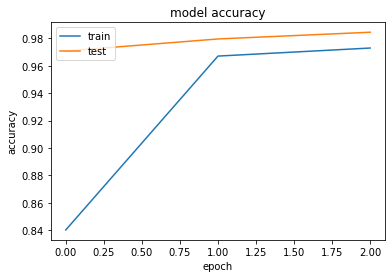

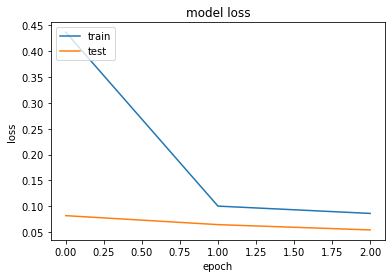

In [106]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9844


[0.054266419261693954, 0.9843597412109375]

# Building Predictive Model

In [108]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score 

from tkinter import *


def classify():
    
    cancer_dataset = pd.read_csv('../Dataset/dataset.csv')
    cancer_dataset = cancer_dataset.drop(columns='id', axis=1)
    cancer_dataset.replace({'diagnosis': {'B':0, 'M':1}}, inplace=True)
    x = cancer_dataset.drop(columns='diagnosis', axis=1)
    y = cancer_dataset['diagnosis']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_train, y_train)
    # 17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
    input_data = (e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get(), e8.get(), e9.get(), e10.get(), e11.get(), e12.get(), e13.get(), e14.get(), e15.get(), e16.get(), e17.get(), e18.get(), e19.get(), e20.get(), e21.get(), e22.get(), e23.get(), e24.get(), e25.get(), e26.get(), e27.get(), e28.get(), e29.get(), e30.get())
    # changing input data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    # reshaping the numpy array
    input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
    # standardizing the data
    std_data = scaler.transform(input_data_reshape)
    prediction = model.predict(std_data)
    if(prediction[0]==0):
        myText.set("Benign")
    else:
        myText.set("Malignant")


        
master = Tk()
myText=StringVar()
master.title("Classification of Cancer")
# root.iconbitmap('Images/codemy.ico')
# master.configure(bg='BLUE')
master.geometry("650x800")



Label(master, text="Radius: ").grid(row=0, sticky=W+E)
Label(master, text="Texture: ").grid(row=1, sticky=W+E)
Label(master, text="Perimeter: ").grid(row=2, sticky=W+E)
Label(master, text="Area: ").grid(row=3, sticky=W+E)
Label(master, text="Smoothness: ").grid(row=4, sticky=W+E)
Label(master, text="Compactness: ").grid(row=5, sticky=W+E)
Label(master, text="Concavity: ").grid(row=6, sticky=W+E)
Label(master, text="Concave Points: ").grid(row=7, sticky=W+E)
Label(master, text="Symmetry: ").grid(row=8, sticky=W+E)
Label(master, text="Fractal Dimension: ").grid(row=9, sticky=W+E)
Label(master, text="Radius_se: ").grid(row=10, sticky=W+E)
Label(master, text="Texture_se: ").grid(row=11, sticky=W+E)
Label(master, text="Perimeter_se: ").grid(row=12, sticky=W+E)
Label(master, text="Area_se: ").grid(row=13, sticky=W+E)
Label(master, text="Smoothness_se: ").grid(row=14, sticky=W+E)
Label(master, text="Compactness_se: ").grid(row=15, sticky=W+E)
Label(master, text="Concavity_se: ").grid(row=16, sticky=W+E)
Label(master, text="Concave Points_se: ").grid(row=17, sticky=W+E)
Label(master, text="Symmetry_se: ").grid(row=18, sticky=W+E)
Label(master, text="Fractal Dimension_se: ").grid(row=19, sticky=W+E)
Label(master, text="Radius Worst: ").grid(row=20, sticky=W+E)
Label(master, text="Texture Worst: ").grid(row=21, sticky=W+E)
Label(master, text="Perimeter Worst: ").grid(row=22, sticky=W+E)
Label(master, text="Area Worst: ").grid(row=23, sticky=W+E)
Label(master, text="Smoothness Worst: ").grid(row=24, sticky=W+E)
Label(master, text="Compactness Worst: ").grid(row=25, sticky=W+E)
Label(master, text="Concavity Worst: ").grid(row=26, sticky=W+E)
Label(master, text="Concave Woints Worst: ").grid(row=27, sticky=W+E)
Label(master, text="Symmetry Worst: ").grid(row=28, sticky=W+E)
Label(master, text="Fractal Wimension Worst: ").grid(row=29, sticky=W+E)

Label(master, text="Result:").grid(row=35,column=0, sticky=W)


result=Label(master, text="", textvariable=myText).grid(row=35, column=1, sticky=W+E)




e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23 = Entry(master)
e24 = Entry(master)
e25 = Entry(master)
e26 = Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29 = Entry(master)
e30 = Entry(master)



e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)
e7.grid(row=6, column=1)
e8.grid(row=7, column=1)
e9.grid(row=8, column=1)
e10.grid(row=9, column=1)
e11.grid(row=10, column=1)
e12.grid(row=11, column=1)
e13.grid(row=12, column=1)
e14.grid(row=13, column=1)
e15.grid(row=14, column=1)
e16.grid(row=15, column=1)
e17.grid(row=16, column=1)
e18.grid(row=17, column=1)
e19.grid(row=18, column=1)
e20.grid(row=19, column=1)
e21.grid(row=20, column=1)
e22.grid(row=21, column=1)
e23.grid(row=22, column=1)
e24.grid(row=23, column=1)
e25.grid(row=24, column=1)
e26.grid(row=25, column=1)
e27.grid(row=26, column=1)
e28.grid(row=27, column=1)
e29.grid(row=28, column=1)
e30.grid(row=29, column=1)


b = Button(master, text="Show Result", command=classify)
b.grid(row=30, column=5, columnspan=2, rowspan=2,sticky=W+E+N+S, padx=5, pady=5)


mainloop()